In [1]:
!pip install -r requirements.txt

     |████████████████████████████████| 92.5MB 92kB/s 
     |████████████████████████████████| 17.3MB 32.6MB/s 
     |████████████████████████████████| 13.0MB 44.9MB/s 
     |████████████████████████████████| 317kB 32.1MB/s 
     |████████████████████████████████| 51kB 2.7MB/s 
     |████████████████████████████████| 368kB 37.8MB/s 
     |████████████████████████████████| 102kB 18.6MB/s 
     |████████████████████████████████| 2.2MB 5.9MB/s 
     |████████████████████████████████| 3.2MB 37.6MB/s 
     |████████████████████████████████| 51kB 13.9MB/s 
     |████████████████████████████████| 92kB 17.9MB/s 
  Stored in directory: /home/jovyan/.cache/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
  Stored in directory: /home/jovyan/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
  Stored in directory: /home/jovyan/.cache/pip/wheels/7c/06/54/bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
  Stored in directory: /home/jovyan/.cache/pip

# using LSTM

In [2]:
# Recurrent Neural Network



# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [4]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [5]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)



Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1198/1198 [==============================] - 30s 25ms/step - loss: 0.0438
Epoch 2/100
1198/1198 [==============================] - 23s 19ms/step - loss: 0.0062
Epoch 3/100
1198/1198 [==============================] - 23s 19ms/step - loss: 0.0055
Epoch 4/100
1198/1198 [==============================] - 23s 19ms/step - loss: 0.0046
Epoch 5/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0047
Epoch 6/100
1198/1198 [==============================] - 20s 17ms/step - loss: 0.0046
Epoch 7/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0045
Epoch 8/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0043
Epoch 9/100
1198/1198 [==============================] - 21s 18ms/step - loss

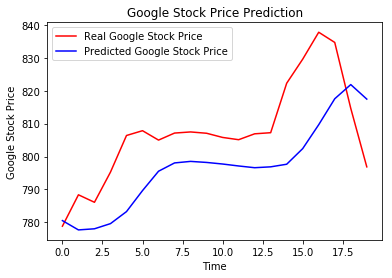

In [6]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

# using GRU

In [7]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import GRU
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first GRU layer and some Dropout regularisation
regressor.add(GRU(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second GRU layer and some Dropout regularisation
regressor.add(GRU(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third GRU layer and some Dropout regularisation
regressor.add(GRU(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth GRU layer and some Dropout regularisation
regressor.add(GRU(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 22s 18ms/step - loss: 0.0385
Epoch 2/100
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0075
Epoch 3/100
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0057
Epoch 4/100
1198/1198 [==============================] - 20s 16ms/step - loss: 0.0057
Epoch 5/100
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0047
Epoch 6/100
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0046
Epoch 7/100
1198/1198 [==============================] - 16s 14ms/step - loss: 0.0042
Epoch 8/100
1198/1198 [==============================] - 16s 14ms/step - loss: 0.0037
Epoch 9/100
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0037
Epoch 10/100
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0038
Epoch 11/100
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0034
Epoch 12/100
1198/1198 [============================

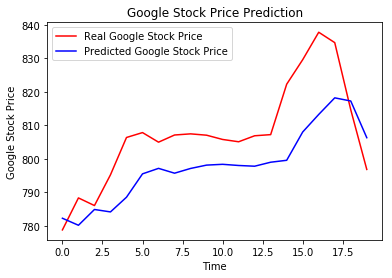

In [8]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):e
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [9]:
# using GRU - increasing units and decreasing Dropout

In [9]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import GRU
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first GRU layer and some Dropout regularisation
regressor.add(GRU(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.1))

# Adding a second GRU layer and some Dropout regularisation
regressor.add(GRU(units = 100, return_sequences = True))
regressor.add(Dropout(0.1))

# Adding a third GRU layer and some Dropout regularisation
regressor.add(GRU(units = 100, return_sequences = True))
regressor.add(Dropout(0.1))

# Adding a fourth GRU layer and some Dropout regularisation
regressor.add(GRU(units = 100))
regressor.add(Dropout(0.1))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 27s 23ms/step - loss: 0.0240
Epoch 2/100
1198/1198 [==============================] - 22s 18ms/step - loss: 0.0026
Epoch 3/100
1198/1198 [==============================] - 23s 19ms/step - loss: 0.0021
Epoch 4/100
1198/1198 [==============================] - 22s 18ms/step - loss: 0.0022
Epoch 5/100
1198/1198 [==============================] - 24s 20ms/step - loss: 0.0022
Epoch 6/100
1198/1198 [==============================] - 28s 24ms/step - loss: 0.0019
Epoch 7/100
1198/1198 [==============================] - 27s 23ms/step - loss: 0.0018
Epoch 8/100
1198/1198 [==============================] - 27s 23ms/step - loss: 0.0019
Epoch 9/100
1198/1198 [==============================] - 26s 22ms/step - loss: 0.0020
Epoch 10/100
1198/1198 [==============================] - 26s 22ms/step - loss: 0.0016
Epoch 11/100
1198/1198 [==============================] - 23s 20ms/step - loss: 0.0017
Epoch 12/100
1198/1198 [============================

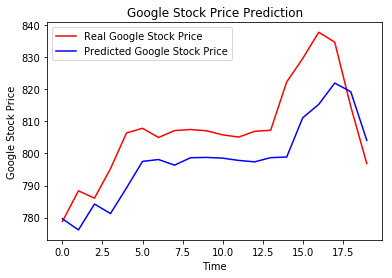

In [10]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()